# One Layer Neural Network in Tensorflow

Import tensorflow module, mnist dataset and matplotlib library for ploting learning history

In [2]:
import os
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

Load MNIST data

In [3]:
os.environ['http_proxy']="10.158.100.120:8080"
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Define variables and placeholders

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Initialize variables

In [5]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Define computation graph for softmax classifier

![title](softmax.png)

![title](softmax_2.png)

In [6]:
Y = tf.nn.softmax(tf.matmul(X, W) + b)
Y_pred = tf.placeholder(tf.float32, [None, 10])

Define cross entropy [*loss function*]

In [7]:
cross_entropy = -tf.reduce_sum(Y_pred * tf.log(Y))

In [8]:
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Define Gradient Descent Optimizer

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [10]:
sess = tf.Session()
sess.run(init)

In [11]:
test_accuracy = []
test_cross = []
for i in range(1000):
    # Load batch
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_pred: batch_Y}

    # Train
    sess.run(train_step, feed_dict=train_data)
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)

    test_data = {X: mnist.test.images, Y_pred: mnist.test.labels}
    a_test, c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    print("Train data Accuracy: {}, Train data Cross Entropy: {}".format(a_train, c_train))
    print("Test data Accuracy: {}, Train data Cross Entropy: {}".format(a_test, c_test))

    # Append to list
    test_accuracy.append(a_test)
    test_cross.append(c_test)


Train data Accuracy: 0.569999933243, Train data Cross Entropy: 182.65826416
Test data Accuracy: 0.407499879599, Train data Cross Entropy: 20325.3867188
Train data Accuracy: 0.620000004768, Train data Cross Entropy: 157.812072754
Test data Accuracy: 0.475099891424, Train data Cross Entropy: 18402.53125
Train data Accuracy: 0.719999969006, Train data Cross Entropy: 137.197235107
Test data Accuracy: 0.555999875069, Train data Cross Entropy: 16605.5371094
Train data Accuracy: 0.740000009537, Train data Cross Entropy: 123.09552002
Test data Accuracy: 0.635299921036, Train data Cross Entropy: 14866.6025391
Train data Accuracy: 0.919999957085, Train data Cross Entropy: 109.89768219
Test data Accuracy: 0.753799974918, Train data Cross Entropy: 13360.5996094
Train data Accuracy: 0.769999980927, Train data Cross Entropy: 103.251838684
Test data Accuracy: 0.61469990015, Train data Cross Entropy: 13041.5771484
Train data Accuracy: 0.810000061989, Train data Cross Entropy: 99.7298736572
Test data A

Final Accuracy something about 92 %

### Plot learning history

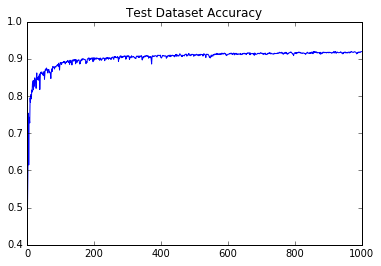

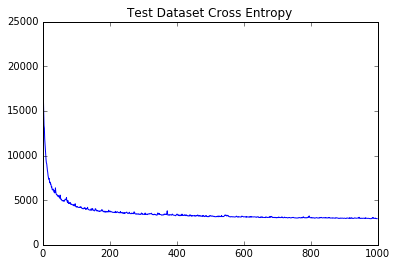

In [14]:
plt.figure()
plt.title("Test Dataset Accuracy")
plt.plot(test_accuracy)
plt.figure()
plt.title("Test Dataset Cross Entropy")
plt.plot(test_cross)
plt.show()